### Importing Libraries

---

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom Seaborn Style

---

In [2]:
sns.set_theme('paper')
sns.set_style('ticks')

### Adding `utils` to `PYTHONPATH`

---

In [3]:
sys.path.append(os.path.abspath("../utils"))

### Reading Parquet File

---

In [4]:
# Importing load_parquet function from read_data module
from read_data import load_parquet
cars = load_parquet('clean_data', 'clean_data_with_no_outlier.parquet')
cars.head()

,km_driven,fuel_type,transmission,owner,price,engine_capacity,year,brand,model
0,88760,Petrol,Manual,1st owner,219000,998,2012,Maruti,Wagon R 1.0
1,17920,Petrol,Manual,1st owner,266000,796,2016,Maruti,Alto 800
2,9940,Petrol,Manual,1st owner,496000,1373,2014,Maruti,Ertiga
3,67340,Petrol,Manual,2nd owner,355000,1199,2016,Tata,Tiago
4,30390,Petrol,Manual,1st owner,530000,998,2023,Maruti,New Wagon-R


In [5]:
# Since we have removed some data while outlier detection and removal,
# Some of the categories in categorical columns might got removed but the category will still be present
# Because we have converted object datatype into category datatype, so we have to remove these unused categories manually
cat_col = cars.select_dtypes(include='category').columns
for column in cat_col:
    cars[column] = cars[column].cat.remove_unused_categories()

### Analyzing `fuel_type` Column

---

In [6]:
# Unique categories in "fuel_type" column
cars['fuel_type'].unique()

['Petrol', 'Diesel', 'CNG', 'Electric']
Categories (4, object): ['CNG', 'Diesel', 'Electric', 'Petrol']

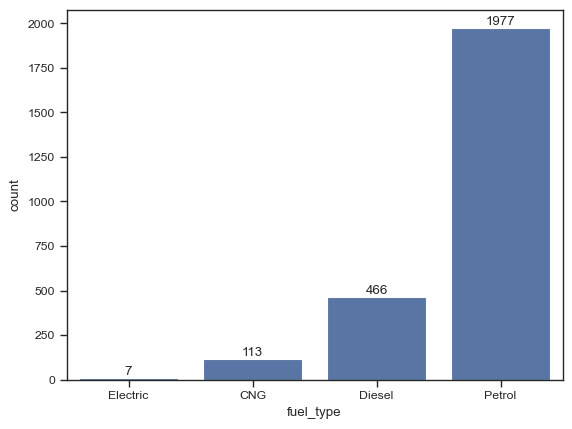

In [7]:
# Count of different categories in "fuel_type" column
ax = sns.countplot(x=cars['fuel_type'], order=cars['fuel_type'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.show()

**Interpretation of above Plot :**
- Petrol is by far the most common fuel type, with 1977 entries.
- It makes up ~76.5% of the total vehicles in the dataset.
- Diesel vehicles account for 466 entries (~18%).
- Only 113 vehicles (~4.4%) use Compressed Natural Gas.
- Just 7 vehicles (<0.3%) are electric.

In [8]:
# Average Price based on "fuel_type" column
cars.groupby(by='fuel_type', observed=True)['price'].mean().apply(lambda x: round(x)).sort_values()

fuel_type
CNG         505805
Petrol      601108
Electric    613000
Diesel      878562
Name: price, dtype: int64

- Electric cars have higher average price than CNG and Petrol despite having only 7 entries.
- This indicates that the few electric vehicles included are likely premium models, skewing the average upward.
- With such a small sample size (<0.3%), Electric cars don't provide statistically meaningful information.
- So its better to exclude Electric cars from the data.

In [9]:
# Removing Electric from "fuel_type" column
cars = cars[~cars['fuel_type'].isin(['Electric'])]

In [10]:
# Removing unused categories from "fuel_type" column
cars['fuel_type'] = cars['fuel_type'].cat.remove_unused_categories()

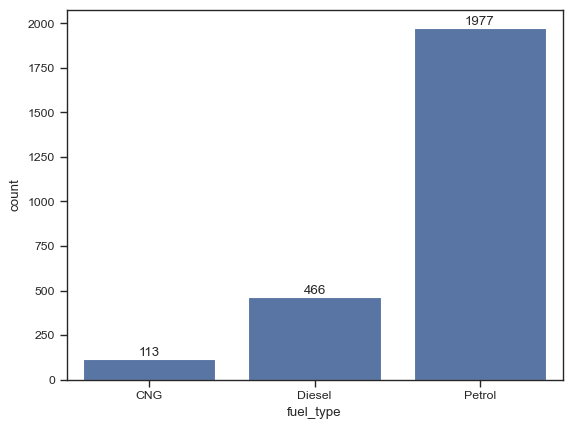

In [11]:
# Count of different categories in "fuel_type" column after transformation
ax = sns.countplot(x=cars['fuel_type'], order=cars['fuel_type'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.show()

### Analyzing `owner` Column

---

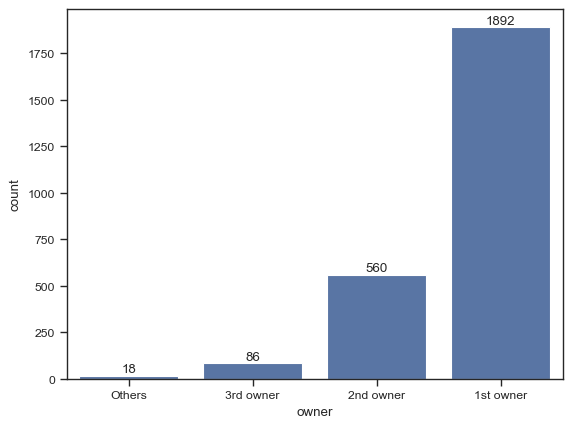

In [12]:
# Count of different categories in "owner" column
ax = sns.countplot(x=cars['owner'], order=cars['owner'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.show()

**Interpretation of above Plot :**
- 1st Owner dominates with 1892 entries (~73.6%).
- 2nd Owner is the second largest group with 560 entries (~21.8%).
- 3rd Owner and Others are minimal, with 86 (3.3%) and 18 (0.7%) entries respectively.
- Majority of vehicles are first-hand, indicating a relatively newer or less-used vehicle dataset.

In [13]:
# Average Price based on "owner" column
cars.groupby(by='owner', observed=True)['price'].mean().apply(lambda x: round(x)).sort_index()

owner
1st owner    677328
2nd owner    577566
3rd owner    503849
Others       371333
Name: price, dtype: int64

- There is a consistent decline in average price from 1st owner to Others.
- The drop in average price reflects vehicle depreciation and perceived lower value as the vehicle passes through more owners.

### Analyzing `year` Column

---

In [14]:
# Unique categories in "year" column
cars['year'].unique()

array([2012, 2016, 2014, 2023, 2021, 2024, 2020, 2022, 2018, 2019, 2017,
       2015, 2013, 2011, 2010], dtype=int16)

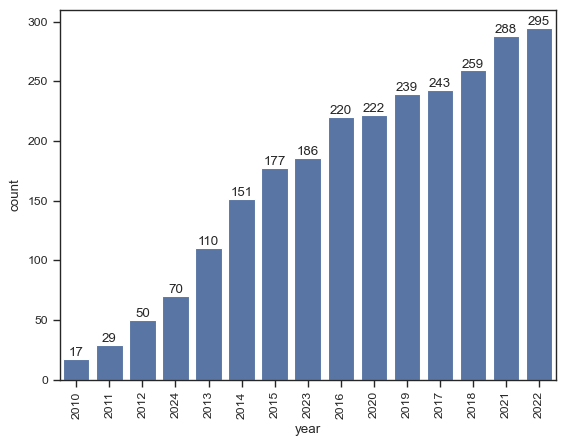

In [15]:
# Count of different categories in "year" column
ax = sns.countplot(x=cars['year'], order=cars['year'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

**Interpretation of above Plot :**
- The number of cars increases steadily over time, reaching its peak in 2022.
- Recent years (2021–2022) have the highest number of cars.
- Older years (2010-2011) have relatively fewer cars.

In [16]:
# Average Price based on "year" column
cars.groupby(by='year', observed=True)['price'].mean().apply(lambda x: round(x)).sort_index()

year
2010    249412
2011    261276
2012    286580
2013    368736
2014    361351
2015    437096
2016    485341
2017    591996
2018    601251
2019    639423
2020    725027
2021    784462
2022    876637
2023    992215
2024    958614
Name: price, dtype: int64

- Average price increases consistently with manufacturing year.
- The pricing follows a logical increase per year, showing a reliable pattern.

### Analyzing `transmission` Column

---

In [17]:
# Unique categories in "transmission" column
cars['transmission'].unique()

['Manual', 'Automatic']
Categories (2, object): ['Automatic', 'Manual']

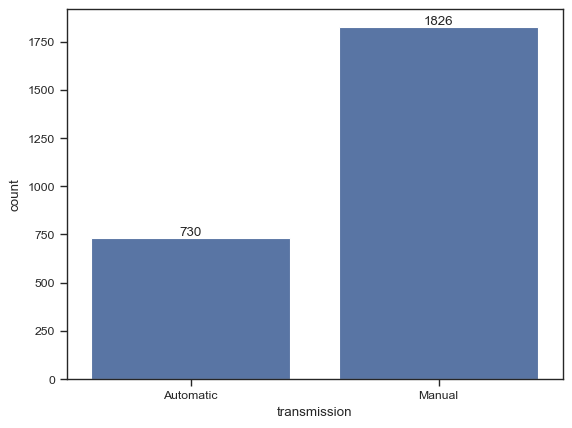

In [18]:
# Count of different categories in "transmission" column
ax = sns.countplot(x=cars['transmission'])
ax.bar_label(ax.containers[0])
plt.show()

**Interpretation of above Plot :**
- Manual is the most common transmission type, with 1826 entries (~71.4%).
- Automatic is less common, with 730 entries (~28.6%).

In [19]:
# Average Price based on "transmission" column
cars.groupby(by='transmission', observed=True)['price'].mean().apply(lambda x: round(x)).sort_values()

transmission
Manual       571733
Automatic    836949
Name: price, dtype: int64

- Average price of automatic cars is higher than manual cars.
- Reflects that automatic transmissions are often found in premium or newer models.
- Manual transmissions are typically more affordable and found in cheap and midrange cars.

### Relationship between Features and Target Variable

---

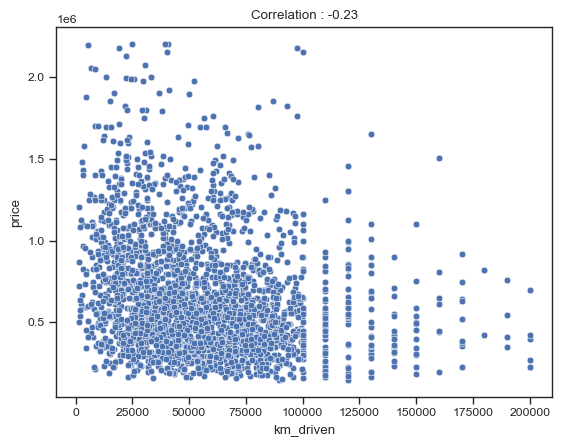

In [20]:
# Relationship between "km_driven" and "price"
sns.scatterplot(x=cars['km_driven'], y=cars['price'])
plt.title(f"Correlation : {cars['km_driven'].corr(cars['price']):.2f}")
plt.show()

**Interpretation of above Plot :**
- The scatter plot shows the relationship between km_driven and price column.
- The correlation coefficient is -0.23, indicating a weak negative correlation.
- It means as km_driven increases, price tends to decrease.
- The effect of km_driven on price makes sense but it's not very strong.

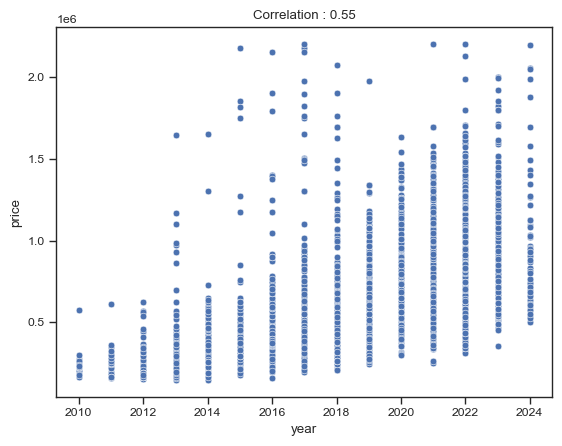

In [21]:
# Relationship between "year" and "price"
sns.scatterplot(x=cars['year'], y=cars['price'])
plt.title(f"Correlation : {cars['year'].corr(cars['price']):.2f}")
plt.show()

**Interpretation of above Plot :**
- The scatter plot shows the relationship between year and price column.
- The correlation coefficient is 0.55, indicating a moderate positive correlation.
- It means as manufacturing year increases, the price of the car also increases.
- Correlation value is strong enough to confirm that newer cars are more expensive.

### Correlation Matrix

---

In [22]:
# Calculating Correlation Matrix
corr = cars.corr(numeric_only=True)

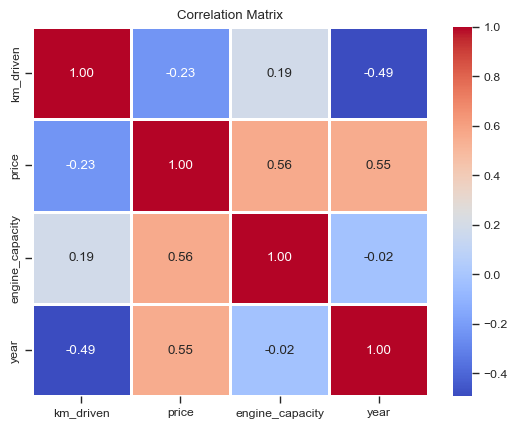

In [23]:
# Plotting Correlation Matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()

**Interpretation of above Plot :**
<li>km_driven and price have a weak negative correlation (-0.23).</li>
<li>It means as the number of km_driven increases, the price tends to decrease slightly.</li>
<br>
<li>year and price have a moderate positive correlation (0.55).</li>
<li>It means newer cars are generally priced higher than older ones.</li>
<br>
<li>engine_capacity and price have a moderate positive correlation (0.56).</li>
<li>It means cars with higher engine capacity generally tend to be priced higher.</li>
<br>
<li>All diagonal values are 1.00, as each feature is perfectly correlated with itself.</li>

---

In [24]:
# Resetting Index
cars.reset_index(drop=True, inplace=True)

### Exporting Final DataFrame as Parquet File

---

In [26]:
# Importing export_as_parquet function from export_data module
from export_data import export_as_parquet
export_as_parquet(cars, 'clean_data', 'clean_data_after_eda.parquet')

Successfully exported the DataFrame as 'clean_data_after_eda.parquet'
